# Project 8: Online Shopping Purchase Intent Detection
#### By Group 6

### Importing of modules:

In [1]:
import numpy as np
from IPython.display import display,HTML
from numpy import *

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))



### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).


 ### Importing data

We will begin with Importing our Training data and Cross-Vaidation data set which will be used to train our Neural Network, as well as the appropriate Testing data. I have also printed a sample from our Training data to visualized what the data looks like.

In [2]:
### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 
import numpy as np

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd

data = loadtxt('group6_train.dat')
column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']
CV = loadtxt('group6_CV.dat')
Tx = loadtxt('group6_test.dat')
display(pd.DataFrame(data,columns = column_labels).head(10))


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0,0.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0,0.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0,1.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0,0.0


## Support Vector Machines Implementation:

### Reading in the Data

The first step is to load the data. The data for this part is provided in a ```csv``` file called ```group6_test.csv``` which contains 18 columns of data: Columns from 1 until 17 represent the data of which the buyer will buy or not; the last column represents whether the customer eventually made a purchase (```1```) or not (```0```).

In [3]:
DataIn = Tx

#Set m and n
m = DataIn.shape[0]
n = DataIn.shape[1]-1 #The final column is not a feature; it's the target variable


#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = DataIn[:,0:n]
y = DataIn[:,n].reshape(m,1)

### Visualizing the Data (If Possible)

Below the data that will be utilised is shown below.

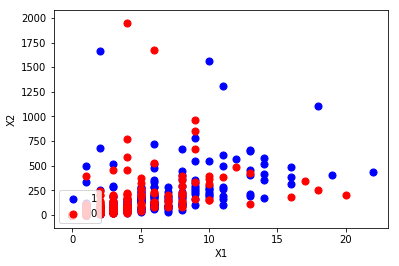

In [4]:
import matplotlib.pyplot as plt

X_training= X


y_training= y.squeeze()

y_training = np.where(y_training, 1, 0)
plt.scatter(X_training[y_training ==1, 0],X_training[y_training ==1, 1],c='b',s=50)
plt.scatter(X_training[y_training ==0, 0],X_training[y_training== 0, 1],c='r',s=50)
plt.legend(["1", "0"],loc=3)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('nl-chart0.png')

### Feature Scaling 

The dataset contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, for e.g 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

### How is the  StandardScaler achieved 

The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.


In [5]:
from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None
    
    #FILL IN BELOW:
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #STOP FILLING IN HERE
    
    return X_scaled,scaler


X_scaled,scalerpt1 = getScaledX(X)


#### The trained model

The SVM model was trained using different 8 cost functions and also 8 gammas in order to obtain the best combination to be able to find the best CV accuracy. all the gammas and cost functions were given in the project discriptions. 

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


svm = SVC(kernel='rbf', random_state=0,C=2048, gamma=0.00048828125)
svm.fit(X_scaled, y.squeeze())


SVC(C=2048, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00048828125,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

#### Testing the model

Now we'll get the confusion matrix from the ```sklearn.metrics``` library's ```confusion_matrix``` function and record the results for later analysis:

In [7]:
from sklearn.metrics import accuracy_score

def SVMTest(X):
    test = svm.predict(X)
    return test

predicted = SVMTest((X_scaled))
acc1 = accuracy_score(y, predicted)*100
cm1 = confusion_matrix(y, predicted)
ttl1 = 'SVM RBF Kernel Confusion Matrix - Test Data \n With accuracy score of:  '

In [8]:
import sklearn.metrics as sklm

def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y, predicted)
SVMresult = [accskl*100,recskl*100,precskl*100,f1skl*100]

## <font color = black> Neural Network Implementation: </font>

Training data into X and y which represents the features and the results respectively. Similarly, CV data has been divided into cX and cy respectively, and the Testing data into tX and ty which will be used later in this notebook for fitting purposes.

In [9]:
#Set X and y
X = data[:,:17]
y = data[:,17]

#Set cX and cy
cX = CV[:,:17]
cy = CV[:,17]

#Set tX and ty
tX = Tx[:,:17]
ty = Tx[:,17]


#### Feature Scaling

We have learnt that Neural Networks may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Thus I made use of the built-in StandardScaler for standardization which is standardizes featured by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated described earlier on in the notebook.


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
scaler.fit(tX)
X = scaler.transform(X)
cX = scaler.transform(cX)
tX = scaler.transform(tX)


#### The trained model

SciKit Learn has a neural_network library that can be used to train our data. In this case we will import the object estimator called the Multi-Layer Perceptron Classifier model.

Note that Perceptron is a linear classifier (binary) and that it is used in supervised learning, as it helps classify a given input data as either 1 or 0.

In [11]:
from sklearn.neural_network import MLPClassifier

Below I have initialized my final Neural Network all with 15 Hidden nodes in its (one and only) Hidden Layer with a learning rate of 0.05.

In [12]:
mlp = MLPClassifier(hidden_layer_sizes = 3, max_iter = 500,solver='sgd', learning_rate_init = 0.1)
mlp.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.1, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### Testing the model
We then made use of the testing data to make predictions and the results were stored for later analysis.

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

def NNTest(X):
    test = mlp.predict(X)
    return test

test = NNTest(tX)
cm2 = confusion_matrix(ty,test)
    
score2 = accuracy_score(ty,test)*100
NNresult = [accuracy_score(ty,test)*100,recall_score(ty,test)*100,precision_score(ty,test)*100,f1_score(ty,test)*100]
ttl2 = 'Neural Network Confusion Matrix - Test Data \n With accuracy score of:  '
  

## <font color = black> Logistic Regression Implementation: </font>

#### The trained model
This is the best model using the training data and the cross validation data

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

m_test = Tx.shape[0]
n_test = Tx.shape[1]-1
m = data.shape[0]
n = data.shape[1]-1

X_test = Tx[:,0:n_test]
y_test = Tx[:,n_test].reshape(m_test,1)
X = data[:,0:n]
y = data[:,n].reshape(m,1)


X_scaled = scale(X)
X_scaled_test = scale(X_test)


LogReg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', penalty = 'l2',C = 10)

y_arry = []
for i in range(m):
    
    y_arry.append(y[i][0])

LogReg.fit(X_scaled,y_arry)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Testing the model

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

def LogTest(X):
    test = LogReg.predict(X)
    return test

y_pred_test = LogTest(X_scaled_test)
acc3 = accuracy_score(y_test,LogReg.predict(X_scaled_test))*100
cm3 = confusion_matrix(y_test,y_pred_test)
ttl3 = 'Logistic Regression Confusion Matrix - Test Data \n With accuracy score of:  '

Logresult = [accuracy_score(y_test,y_pred_test)*100,recall_score(y_test,y_pred_test)*100,precision_score(y_test,y_pred_test)*100,f1_score(y_test,y_pred_test)*100]

## OBTAINING THE CONFUSION MATRIX AND VISUALIZING IT 

Now we will compare the results for the 3 varying Classifiers. 

Note the Confusion Matrix is printed in the format ```[[TN,FP],[FN,TP]]```

If Negative is 1 and Positive is 0 then:

    True Negative: Represent a number of datasets that were actually = 0 and the Classifier predicted = 0
    False Postive: Represent a number of datasets that were actually = 0 and the Classifier predicted = 1
    False Negative: Represent a number of datasets that were actually = 1 and the Classifier predicted = 0
    True Positive: Represent a number of datasets that were actually = 1 and the Classifier predicted = 1


In [16]:
#Graph defined to draw the respective Confusion Matrices
def draw_graph(cm,ttl,acc): 
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(ttl + str(round(acc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

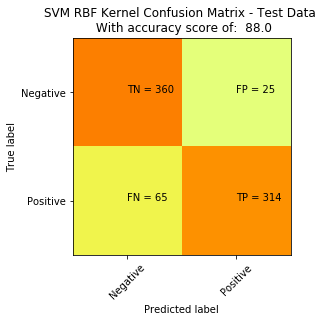

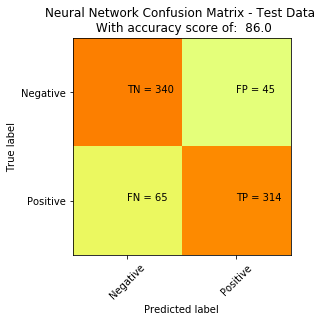

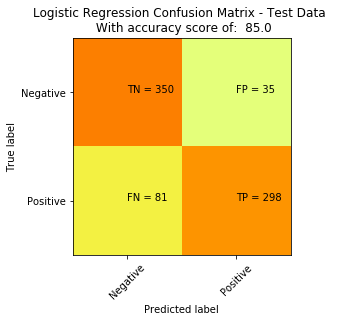

In [17]:
draw_graph(cm1,ttl1,acc1)
draw_graph(cm2,ttl2,score2)
draw_graph(cm3,ttl3,acc3)

## Testing Metrics: Accuracy, Recall, Precision and Score:

### Accuracy

Accuracy - is defined as the ratio of correctly predicted examples by the total examples. One may think that, if a model has a high accuracy then the model is best. Yes, accuracy is an outstanding measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.It can be calculated using the following formula: 
$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}\times100
$$

Similarly, Accuracy can be calculated using the built in function '```accuracy_score(y,x)```' from the ```SKLearn library````

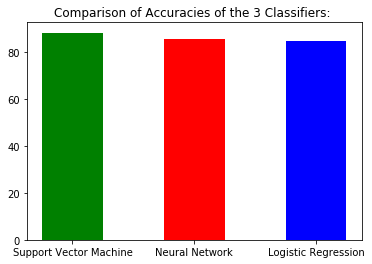


From the graph above we can see that:

 	 	Support Vector Machine has an Accuracy of 88.0%

 	 	Neural Network has an Accuracy of 86.0%

 	 	Logistic Regression has an Accuracy of 85.0%


In [18]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[0],NNresult[0],Logresult[0]]

plt.title("Comparison of Accuracies of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Accuracy of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Accuracy of " + str(round(temp[2])) +"%")

Having a high accuracy doesnt mean the model is the best hence other parameters have to be taken to consideration. 

## Precision

Precision — Also called Positive predictive value. It is the ratio of correct positive predictions to the total predicted positives. A high Precision indicates   It is calculated using the following formula:
$$
\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}\times100
$$

Similarly, Precision can be calculated using the built in function '```precision_score(y,x)```' from the ```SKLearn library```.

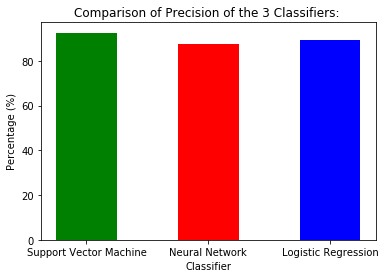


From the graph above we can see that:

 	 	Support Vector Machine has an Precision of 93.0%

 	 	Neural Network has an Precision of 87.0%

 	 	Logistic Regression has an Precision of 89.0%


In [19]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[2],NNresult[2],Logresult[2]]

plt.title("Comparison of Precision of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Precision of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Precision of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Precision of " + str(round(temp[2])) +"%")

Precision answers the question of all customers that were ```predicted``` as made a purchase, how many of them ```actually``` made the purchase? Notice that a high precision relates to the low ```False Positive rate```.

## Recall

Recall — Also called Sensitivity, Probability of Detection, True Positive Rate. Recall is the ratio of correct positive predictions to the total positives examples, in this case, testing sample. It is calculated using the following formula:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}\times100
$$

Similarly, Recall can be calculated using the built in function '```recall_score(y,x)```' from the ```SKLearn library```

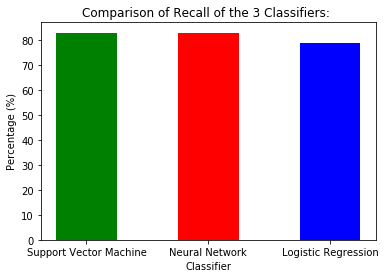


From the graph above we can see that:

 	 	Support Vector Machine has an Recall of 83.0%

 	 	Neural Network has an Recall of 83.0%

 	 	Logistic Regression has an Recall of 79.0%


In [20]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[1],NNresult[1],Logresult[1]]

plt.title("Comparison of Recall of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an Recall of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an Recall of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an Recall of " + str(round(temp[2])) +"%")

Recall addresses the question of all the customers that ```actually``` made a purchase, how many did the classifier ```predict``` correct? A recall above ```0.5``` (50%) is satisfactory.

If Recall and Precision are equal in the case of the Neural Network classifier, since they have the same  denominator, we get:

$$
\text{FP}={\text{FN}}
$$

This means, the classifier has classified an equal amount of users as ```False Positives``` (predicted made a purchase, but actually did not), as it classified ```False Negatives```. This is caused by the fact that the data set had an equal set of customers who made a purchase(expert) and did not make a purchase(non-expert).

## F1 Score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. It is calculated using the formula:

$$
\text{F1 Score} = \frac{2\times\text{Recall}\times\text{Precision}}{\text{Recall}+ \text{Precision}}\times100
$$

Similarly, F1 Score can be calculated using the built in function '```f1_score(y,x)```' from the ```SKLearn library```

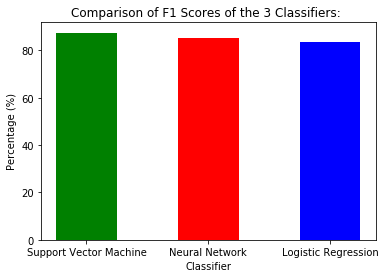


From the graph above we can see that:

 	 	Support Vector Machine has an F1 Score of 87.0%

 	 	Neural Network has an F1 Score of 85.0%

 	 	Logistic Regression has an F1 Score of 84.0%


In [21]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"
temp = [SVMresult[3],NNresult[3],Logresult[3]]


plt.title("Comparison of F1 Scores of the 3 Classifiers: ")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.ylabel("Percentage (%)")
plt.xlabel("Classifier")
plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tSupport Vector Machine has an F1 Score of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an F1 Score of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression has an F1 Score of " + str(round(temp[2])) +"%")

# Conclusion

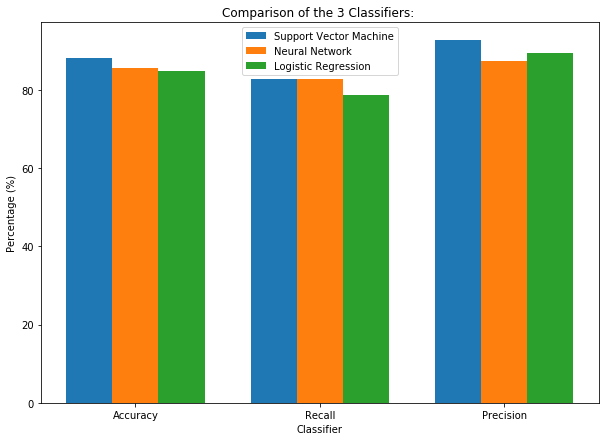

In [26]:
titles = "Support Vector Machine","Neural Network", "Logistic Regression"

N = 3
temp1 = [SVMresult[0],SVMresult[1],SVMresult[2]]
temp2 = [NNresult[0],NNresult[1],NNresult[2]]
temp3 = [Logresult[0],Logresult[1],Logresult[2]]

figsize = (10,5)
fig, ax = plt.subplots(figsize = (10,7))
ind = np.arange(N)
width = 0.25
p1 = ax.bar(ind, temp1,width, bottom = 0)
p2 = ax.bar(ind + width, temp2,width, bottom = 0)
p3 = ax.bar((ind +width +width), temp3,width, bottom = 0)
ax.set_title("Comparison of the 3 Classifiers: ")
ax.set_xticks(ind + width)
ax.set_xticklabels(('Accuracy','Recall','Precision'))
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Classifier")
ax.legend((p1[0],p2[0],p3[0]),(titles))
ax.autoscale_view()
plt.show()




Thus inorder to choose the suitable classifier, one needs to assess the application at hand. We were instructed to create classifiers that could predict whether online customers/visitors would make a purchase on the said website based on various data statistics. Thus inorder to choose a model that will predict correctly and confidently, the model with the highest ```Precision``` would be suitable. On the other hand, if a  model that can ensure that all customers/visitors who will make purchases are captured or recorded, then the model with the highest ```Recall``` would be suitable.
